51553.32999999998


c:\Users\Conor King\Documents\School\EEC 289Q\TSP\TSP\src\simulatedAnnealing.py:43: RuntimeWarning: overflow encountered in scalar divide
  if new_cost < old_cost or np.random.rand() < np.exp((old_cost - new_cost) / self.temperature):


Time limit reached.
9709.160000000007


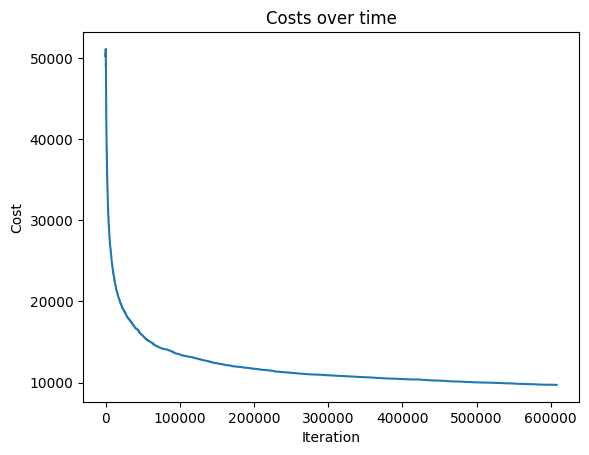

In [9]:
from src.tspInstance import tspInstance
from src.simulatedAnnealing import SimulatedAnnealing

tspNonEu = tspInstance()
tspNonEu.reader('C:\\Users\\Conor King\\Documents\\School\\EEC 289Q\\TSP\\TSP\\data\\1000_euclidianDistance.txt')

initialSol = tspNonEu.solutionGen()
initialCost = tspNonEu.solutionCheck(initialSol)
print(initialCost)

sa = SimulatedAnnealing(tspNonEu,cooling_rate=0.99,num_iterations=1000000)
best_solution, costs = sa.run(time_limit=600)
#print(best_solution)

cost = tspNonEu.solutionCheck(best_solution)
print(cost)
sa.plot_costs(costs)

In [2]:
from src.greedy import GreedyAlgorithm
from src.tspInstance import tspInstance
from src.greedyEuclid import GreedyEuclid

tsp = tspInstance()
tsp.reader('C:\\Users\\Conor King\\Documents\\School\\EEC 289Q\\TSP\\TSP\\data\\1000_euclidianDistance.txt') 

bestSol = None
bestCost = 50000


ga = GreedyAlgorithm(tsp)

sol = ga.run(mode = 1)
cost = tsp.solutionCheck(sol)

[188, 441, 165, 383, 673, 173, 650, 572, 471, 878, 678, 202, 565, 877, 438, 375, 411, 891, 722, 770, 334, 946, 885, 711, 772, 881, 124, 437, 7, 929, 491, 385, 307, 873, 602, 177, 563, 224, 2, 533, 198, 329, 50, 414, 214, 839, 404, 560, 467, 611, 54, 314, 86, 887, 603, 287, 171, 347, 868, 586, 601, 482, 620, 486, 649, 896, 107, 39, 477, 431, 153, 3, 751, 836, 20, 807, 243, 78, 939, 300, 709, 213, 460, 926, 223, 343, 436, 272, 857, 97, 692, 463, 392, 397, 660, 5, 354, 255, 779, 760, 736, 860, 252, 662, 616, 767, 953, 915, 288, 409, 73, 398, 136, 372, 675, 24, 331, 690, 755, 726, 6, 810, 21, 487, 917, 771, 351, 488, 355, 376, 982, 583, 551, 311, 852, 841, 427, 748, 227, 359, 866, 13, 781, 194, 535, 412, 853, 417, 260, 170, 175, 735, 790, 241, 578, 961, 475, 608, 492, 212, 416, 344, 75, 576, 733, 187, 301, 871, 62, 468, 676, 408, 222, 913, 137, 738, 610, 995, 622, 834, 684, 795, 381, 121, 792, 903, 489, 131, 826, 566, 120, 374, 561, 562, 599, 452, 516, 954, 132, 606, 144, 459, 990, 169, 32

Best number of clusters: 1
Best cost: 2969.6799999999976


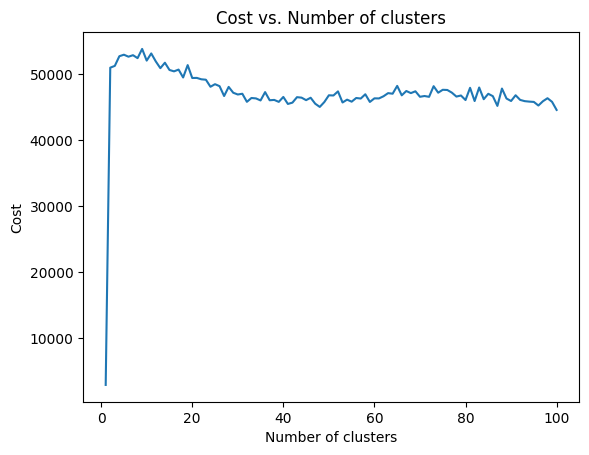

In [4]:
from src.greedy import GreedyAlgorithm
from src.tspInstance import tspInstance
from src.greedyEuclid import GreedyEuclid
import matplotlib.pyplot as plt

tsp = tspInstance()
tsp.reader('C:\\Users\\Conor King\\Documents\\School\\EEC 289Q\\TSP\\TSP\\data\\1000_euclidianDistance.txt') 

# Initialize variables to keep track of the best number of clusters and the best cost
best_n_clusters = None
best_cost = float('inf')

# Initialize a list to keep track of the cost for each number of clusters
costs = []

# Iterate through cluster numbers from 1 through 100
for n_clusters in range(1, 101):
    # Create a GreedyEuclid object
    greedy_euclid = GreedyEuclid(tsp, n_clusters)

    # Run the GreedyEuclid algorithm
    cluster_solutions = greedy_euclid.run()

    # Link the clusters together
    cluster_order = greedy_euclid.link_clusters()

    # Get the overall solution
    overall_solution = greedy_euclid.get_overall_solution(cluster_order)

    # Calculate the cost of the overall solution
    cost = tsp.solutionCheck(overall_solution)

    # Update the best number of clusters and the best cost if necessary
    if cost < best_cost:
        best_n_clusters = n_clusters
        best_cost = cost

    # Append the cost to the list of costs
    costs.append(cost)

# Print the best number of clusters and the best cost
print(f'Best number of clusters: {best_n_clusters}')
print(f'Best cost: {best_cost}')

# Plot cost vs. number of clusters
plt.plot(range(1, 101), costs)
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Cost vs. Number of clusters')
plt.show()

In [5]:
from src.greedy import GreedyAlgorithm
from src.tspInstance import tspInstance
from src.greed2OptMove import Greedy2OptMove

tsp = tspInstance()
tsp.reader('C:\\Users\\Conor King\\Documents\\School\\EEC 289Q\\TSP\\TSP\\data\\1000_euclidianDistance.txt') 

# Create a GreedyAlgorithm object
greedy = GreedyAlgorithm(tsp)

# Run the GreedyAlgorithm with mode=1 to find the best greedy solution
greedy_solution = greedy.run(mode=1)

# Print the total distance of the greedy solution
print(f'Greedy solution distance: {tsp.solutionCheck(greedy_solution)}')

# Create a Greedy2OptMove object
two_opt = Greedy2OptMove(tsp)

# Run the 2-opt heuristic to improve the greedy solution
improved_solution = two_opt.run(greedy_solution)

# Print the total distance of the improved solution
print(f'Improved solution distance: {tsp.solutionCheck(improved_solution)}')

Greedy solution distance: 2837.2200000000053
Improved solution distance: 2543.109999999997
